In [1]:
#We need os in Jupyter to interact with the operating system for tasks like file manipulation and environment variable access.
import os
#We need NumPy in Jupyter because it provides powerful numerical computing capabilities, enabling efficient mathematical operations and data analysis.
import numpy as np
#We need TensorFlow in Jupyter for building, training, and evaluating machine learning models using its powerful deep learning framework.
import tensorflow as tf
#We need matplotlib.pyplot in Jupyter for creating and visualizing plots and graphs to analyze data visually.
import matplotlib.pyplot as plt
#We need OneHotEncoder to convert categorical variables into a format that can be provided to machine learning algorithms, ensuring they can interpret the data correctly
from sklearn.preprocessing import OneHotEncoder


In [2]:
# ai_image_dir variable points to a raw string path pointing to a directory on your Windows system where image data for AI art is stored.
ai_image_dir = r"C:\Users\anura\OneDrive\Desktop\AiArtData"


In [3]:
#checking if the path is correctly specified 
ai_image_dir

'C:\\Users\\anura\\OneDrive\\Desktop\\AiArtData'

In [4]:
# real_image_dir variable points to a raw string path pointing to a directory on your Windows system where image data for AI art is stored.
real_image_dir = r"C:\Users\anura\OneDrive\Desktop\RealArt"

In [5]:
#checking if the path is correctly specified
real_image_dir

'C:\\Users\\anura\\OneDrive\\Desktop\\RealArt'

In [6]:
# FUNCTION TO PREPROCESS LOAD AND IMAGE DATA 
#The `preprocess_image` function reads, decodes, resizes, and applies various random augmentations to an image, then normalizes the pixel values to the range [0, 1].

def preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)
    image = tf.image.random_flip_left_right(image)  # Randomly flip the image horizontally
    image = tf.image.random_flip_up_down(image)     # Randomly flip the image vertically
    image = tf.image.random_brightness(image, max_delta=0.2)  # Randomly adjust brightness
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)  # Randomly adjust contrast
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)  # Randomly adjust saturation
    image = tf.image.random_hue(image, max_delta=0.1)  # Randomly adjust hue
    image = tf.clip_by_value(image, 0, 255)  # Clip pixel values to [0, 255]
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image


In [7]:
#The function load_and_preprocess_images loads all image files from a specified directory, applies a preprocessing function to each, 
# returns a list of preprocessed images.
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [preprocess_image(image_path) for image_path in image_paths]
    return images

In [8]:
# The code snippet creates a list of preprocessed images from a specified directory.
#initializes an array of ones (representing labels) with the same length as the number of images
ai_images = load_and_preprocess_images(ai_image_dir)
# Set label 1 for AI-generated images
ai_labels = np.ones(len(ai_images)) 

In [9]:
#The code loads and preprocesses images from a specified directory and
#initializes an array of zeros (representing labels) with the same length as the number of images.
real_images = load_and_preprocess_images(real_image_dir)
# Set label 0 for real images
real_labels = np.zeros(len(real_images))

In [10]:
#The code combines the AI-generated and real images into a single list and merges their corresponding labels into one array
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

In [11]:
#Convert label to one hot encoding
#The code converts the labels into one-hot encoded format using the OneHotEncoder, transforming them into a binary matrix.
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

In [12]:
#The code converts the lists of images and labels into NumPy arrays.
images = np.array(images)
labels = np.array(labels)

In [13]:
# The code generates a sequence of indices, shuffles them randomly.
#And then rearranges the `images` and `labels` arrays to ensure both are shuffled in the same order.
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]


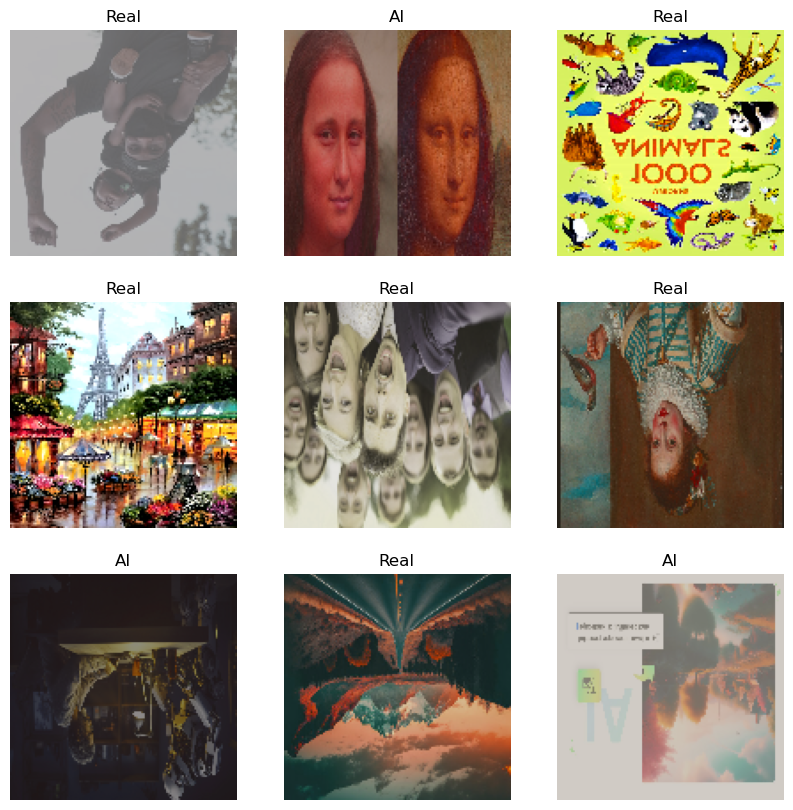

In [14]:
#show preprocess image
#The code displays a 3x3 grid of the first 9 shuffled images with their titles indicating whether each image is AI-generated or real.
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title("AI" if np.argmax(labels[i]) == 1 else "Real")
    plt.axis('off')
plt.show()

In [15]:
#We need os in Jupyter to interact with the operating system for tasks like file manipulation and environment variable access.
import os
#We need NumPy in Jupyter because it provides powerful numerical computing capabilities, enabling efficient mathematical operations and data analysis.
import numpy as np
#We need TensorFlow in Jupyter for building, training, and evaluating machine learning models using its powerful deep learning framework.
import tensorflow as tf
#We need matplotlib.pyplot in Jupyter for creating and visualizing plots and graphs to analyze data visually.
import matplotlib.pyplot as plt
#We need OneHotEncoder to convert categorical variables into a format that can be provided to machine learning algorithms, ensuring they can interpret the data correctly
from sklearn.preprocessing import OneHotEncoder


In [16]:
## ai_image_dir variable points to a raw string path pointing to a directory on your Windows system where image data for AI art is stored.
ai_image_dir = r"C:\Users\anura\OneDrive\Desktop\AiArtData"
## real_image_dir variable points to a raw string path pointing to a directory on your Windows system where image data for AI art is stored.
real_image_dir = r"C:\Users\anura\OneDrive\Desktop\RealArt"

In [17]:
#Function to preprocess load and image data
#The function loads an image from a given path, resizes it, applies various random augmentations (flipping, brightness, contrast, saturation, and hue adjustments)clips pixel values, and 
#normalizes them to the range [0, 1].
def preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)
    # Randomly flip the image horizontally
    image = tf.image.random_flip_left_right(image)
    # Randomly flip the image vertically
    image = tf.image.random_flip_up_down(image)
    # Randomly adjust brightness
    image = tf.image.random_brightness(image, max_delta=0.2)
    # Randomly adjust contrast
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    # Randomly adjust saturation
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)
    # Randomly adjust hue
    image = tf.image.random_hue(image, max_delta=0.1)
    # Clip pixel values to [0, 255]
    image = tf.clip_by_value(image, 0, 255)
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    return image


In [18]:
#Function to load image from DIR and preprocess them
#The load_and_preprocess_images function collects paths to all images in the specified directory, applies the preprocess_image function to each image,
#returns a list of preprocessed images.
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [preprocess_image(image_path) for image_path in image_paths]
    return images

In [19]:
#The code loads and preprocesses images from the ai_image_dir, creating a list of preprocessed AI-generated images. 
#It then creates an array of ones with the same length as the number of AI images, serving as labels to indicate they are AI-generated.
ai_images = load_and_preprocess_images(ai_image_dir)
# Set label 1 for AI-generated images
ai_labels = np.ones(len(ai_images))  


In [20]:
#The code loads and preprocesses images from `real_image_dir`.
#creates an array of zeros with the same length as the number of real images, labeling them as real.
real_images = load_and_preprocess_images(real_image_dir)
real_labels = np.zeros(len(real_images))  # Set label 0 for real images

In [21]:
#The code concatenates AI-generated and real images into a single list and merges their corresponding labels into one array.
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

In [22]:
# The code applies one-hot encoding to the labels, converting them into a binary matrix.
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

In [23]:
# The code converts the lists of images and labels into NumPy arrays.
images = np.array(images)
labels = np.array(labels)

In [24]:
#The code shuffles the indices of the images and labels arrays, and then reorders both arrays according to the shuffled indices.
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

In [25]:
#train_test_split is a function from sklearn.model_selection that divides arrays or matrices into random train and test subsets, allowing for model training and evaluation.
#In Jupyter, it helps in preparing data for machine learning by separating it into training and testing sets.
from sklearn.model_selection import train_test_split

# The code splits the images and labels into training and testing sets. .
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# then prints the shapes of these sets for both images and labels 
print("Training set - Images shape:", X_train.shape, "Labels shape:", y_train.shape)
print("Testing set - Images shape:", X_test.shape, "Labels shape:", y_test.shape)

Training set - Images shape: (780, 128, 128, 3) Labels shape: (780, 2)
Testing set - Images shape: (195, 128, 128, 3) Labels shape: (195, 2)


In [26]:
#We need os in Jupyter to interact with the operating system for tasks like file manipulation and environment variable access.
import os
#We need NumPy in Jupyter because it provides powerful numerical computing capabilities, enabling efficient mathematical operations and data analysis.
import numpy as np
#We need TensorFlow in Jupyter for building, training, and evaluating machine learning models using its powerful deep learning framework.
import tensorflow as tf
#We need matplotlib.pyplot in Jupyter for creating and visualizing plots and graphs to analyze data visually.
import matplotlib.pyplot as plt
#We need OneHotEncoder to convert categorical variables into a format that can be provided to machine learning algorithms, ensuring they can interpret the data correctly
from sklearn.preprocessing import OneHotEncoder

# ai_image_dir variable points to a raw string path pointing to a directory on your Windows system where image data for AI art is stored.
ai_image_dir = r"C:\Users\anura\OneDrive\Desktop\AiArtData"

#real_image_dir variable points to a raw string path pointing to a directory on your Windows system where image data for AI art is stored.
real_image_dir = r"C:\Users\anura\OneDrive\Desktop\RealArt"

In [27]:

# The preprocess_image function reads an image from a file path, decodes it as a JPEG, resizes it, and applies various random augmentations (flips, brightness, contrast, saturation, hue adjustments). 
#It then clips pixel values to ensure they are in the range [0, 255] and normalizes the pixel values to the range [0, 1].
def preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)
     # Randomly flip the image horizontally
    image = tf.image.random_flip_left_right(image) 
    #Randomely flip the image vertically
    image = tf.image.random_flip_up_down(image) 
    # Randomly adjust brightness
    image = tf.image.random_brightness(image, max_delta=0.2)
     # Randomly adjust contrast
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
     # Randomly adjust saturation
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)
     # Randomly adjust hue
    image = tf.image.random_hue(image, max_delta=0.1) 
    # Clip pixel values to [0, 255]
    image = tf.clip_by_value(image, 0, 255) 
    # Normalize pixel values to [0, 1]
    image = image / 255.0  
    return image

In [28]:
#The load_and_preprocess_images function generates a list of preprocessed images from all files in a specified directory.
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [preprocess_image(image_path) for image_path in image_paths]
    return images


In [29]:
# The code loads and preprocesses AI-generated images from `ai_image_dir` and creates an array of ones as labels for these images.
ai_images = load_and_preprocess_images(ai_image_dir)
# Set label 1 for AI-generated images
ai_labels = np.ones(len(ai_images))  

In [30]:
#The code loads and preprocesses real images from `real_image_dir` and creates an array of zeros as labels for these images.
real_images = load_and_preprocess_images(real_image_dir)
# Set label 0 for real images
real_labels = np.zeros(len(real_images))  

In [31]:
# The code concatenates the AI-generated and real images into a single list and merges their labels into one array.
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

#The code applies one-hot encoding to the labels, converting them into a binary matrix format.
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# The code converts the lists of images and labels into NumPy arrays.
images = np.array(images)
labels = np.array(labels)


In [32]:

# The code shuffles the indices of the images and labels arrays and reorders both arrays according to the shuffled indices.
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

#train_test_split is a function from sklearn.model_selection that divides arrays or matrices into random train and test subsets, allowing for model training and evaluation.
#In Jupyter, it helps in preparing data for machine learning by separating it into training and testing sets
from sklearn.model_selection import train_test_split

#The code splits the images and labels into training and testing sets, using 20% of the data for testing and a fixed random seed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

#The code prints the shapes of the training and testing sets for both images and labels.
print("Training set - Images shape:", X_train.shape, "Labels shape:", y_train.shape)
print("Testing set - Images shape:", X_test.shape, "Labels shape:", y_test.shape)

Training set - Images shape: (780, 128, 128, 3) Labels shape: (780, 2)
Testing set - Images shape: (195, 128, 128, 3) Labels shape: (195, 2)


In [33]:
#We need os in Jupyter to interact with the operating system for tasks like file manipulation and environment variable access.
import os
#We need NumPy in Jupyter because it provides powerful numerical computing capabilities, enabling efficient mathematical operations and data analysis.
import numpy as np
#We need TensorFlow in Jupyter for building, training, and evaluating machine learning models using its powerful deep learning framework.
import tensorflow as tf
#We need matplotlib.pyplot in Jupyter for creating and visualizing plots and graphs to analyze data visually.
import matplotlib.pyplot as plt
#We need OneHotEncoder to convert categorical variables into a format that can be provided to machine learning algorithms, ensuring they can interpret the data correctly
from sklearn.preprocessing import OneHotEncoder

# ai_image_dir variable points to a raw string path pointing to a directory on your Windows system where image data for AI art is stored.
ai_image_dir = r"C:\Users\anura\OneDrive\Desktop\AiArtData"
# real_image_dir variable points to a raw string path pointing to a directory on your Windows system where image data for AI art is stored.
real_image_dir = r"C:\Users\anura\OneDrive\Desktop\RealArt"

In [34]:
#The preprocess_image function reads an image from a file, decodes it, resizes it, and applies various random augmentations (flipping, brightness, contrast, saturation, hue adjustments).
#It then clips pixel values to the range [0, 255] and normalizes them to [0, 1].
def preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, target_size)
     # Randomly flip the image horizontally
    image = tf.image.random_flip_left_right(image) 
     # Randomly flip the image vertically
    image = tf.image.random_flip_up_down(image) 
    # Randomly adjust brightness
    image = tf.image.random_brightness(image, max_delta=0.2)  
    # Randomly adjust contrast
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    # Randomly adjust saturation
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)
     # Randomly adjust hue
    image = tf.image.random_hue(image, max_delta=0.1) 
     # Clip pixel values to [0, 255]
    image = tf.clip_by_value(image, 0, 255)
    # Normalize pixel values to [0, 1]
    image = image / 255.0  
    return image


In [35]:
#The load_and_preprocess_images function creates a list of file paths for all images in a directory, preprocesses each image using the preprocess_image function.
#and returns a list of the preprocessed images.
def load_and_preprocess_images(image_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
    images = [preprocess_image(image_path) for image_path in image_paths]
    return images


In [36]:
# The code loads and preprocesses images from the `ai_image_dir` directory and creates an array of ones to label all these images as AI-generated.
ai_images = load_and_preprocess_images(ai_image_dir)
# Set label 1 for AI-generated images
ai_labels = np.ones(len(ai_images))  

In [37]:
# The code loads and preprocesses images from the `real_image_dir` directory and creates an array of zeros to label all these images as real.
real_images = load_and_preprocess_images(real_image_dir)
# Set label 0 for real images
real_labels = np.zeros(len(real_images))  


In [38]:
#The code combines the AI-generated and real images into a single list and concatenates their respective labels into one array.
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

In [39]:
# The code applies one-hot encoding to the `labels`, converting them into a binary matrix where each label is represented by a unique vector.
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

In [40]:
# The code converts the lists of images and labels into NumPy arrays for easier manipulation and processing.
images = np.array(images)
labels = np.array(labels)

In [41]:
#The code creates a shuffled array of indices and reorders the `images` and `labels` arrays according to these shuffled indices.
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

C:\Users\anura\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,239,362 (19.99 MB)

 Trainable params: 5,239,362 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 431ms/step - accuracy: 0.4898 - loss: 0.6970 - val_accuracy: 0.5590 - val_loss: 0.6858
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - accuracy: 0.5709 - loss: 0.6847 - val_accuracy: 0.5692 - val_loss: 0.6859
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.5580 - loss: 0.6824 - val_accuracy: 0.5538 - val_loss: 0.6814
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 394ms/step - accuracy: 0.5422 - loss: 0.6925 - val_accuracy: 0.5385 - val_loss: 0.6772
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.5645 - loss: 0.6786 - val_accuracy: 0.5538 - val_loss: 0.6734
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 394ms/step - accuracy: 0.5923 - loss: 0.6594 - val_accuracy: 0.6205 - val_loss: 0.6778
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - accuracy: 0.5962 - loss: 0.6695 - val_accuracy: 0.5897 - val_loss: 0.7193
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step - accuracy: 0.5826 - loss: 0.6798 - val_accu

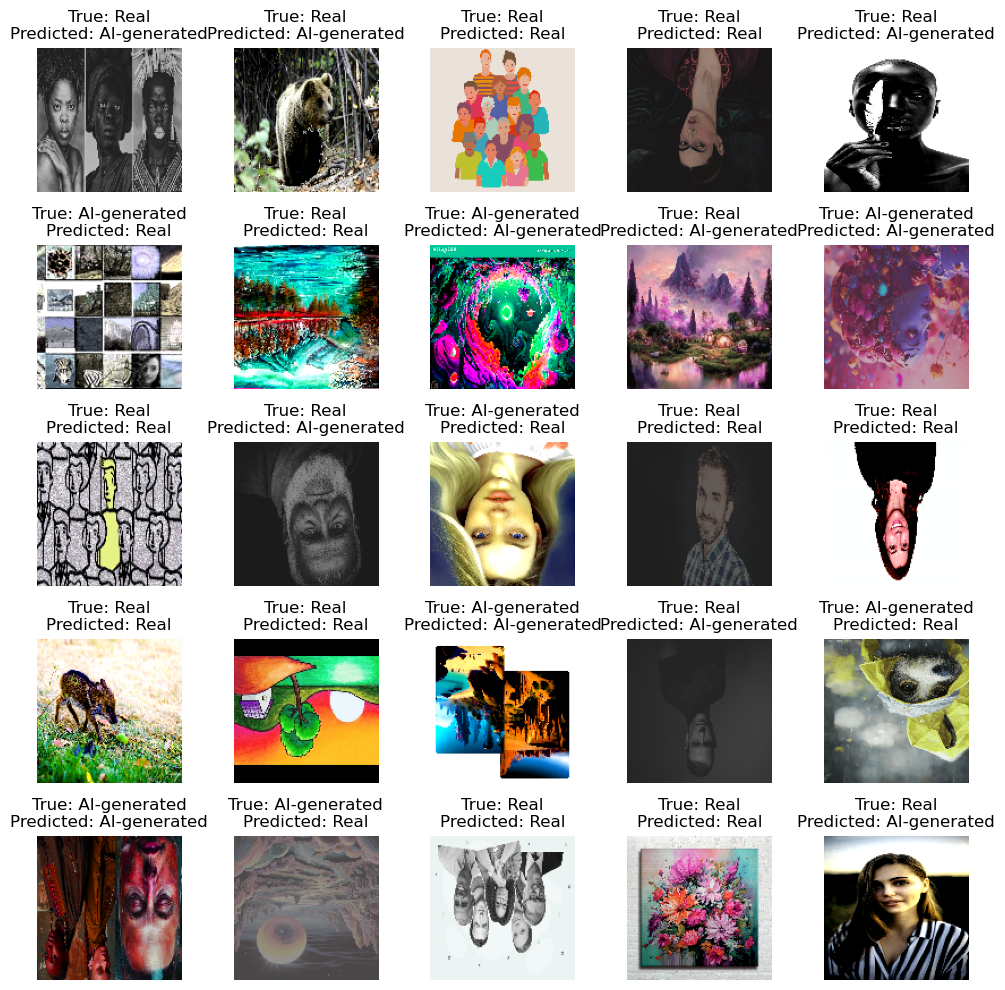

In [42]:
#train_test_split is a function from sklearn.model_selection that divides arrays or matrices into random train and test subsets, allowing for model training and evaluation.
#In Jupyter, it helps in preparing data for machine learning by separating it into training and testing sets
from sklearn.model_selection import train_test_split

# #The code splits the images and labels into training and testing sets, using 20% of the data for testing and a fixed random seed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


#is used to import the Sequential class from Keras, a high-level API for building and training neural networks in TensorFlow.
from tensorflow.keras.models import Sequential

# imports essential layers for building convolutional neural networks: Conv2D for convolutional operations, MaxPooling2D for downsampling, Flatten to reshape data, 
#Dense for fully connected layers,Dropout for regularization.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#`from tensorflow.keras.optimizers import Adam` imports the Adam optimizer from Keras, a popular optimization algorithm that combines the advantages of two other optimizers, 
#AdaGrad and RMSProp, to efficiently update network weights during training.
from tensorflow.keras.optimizers import Adam

# The code builds a CNN model with multiple convolutional and pooling layers for feature extraction, followed by fully connected layers with dropout for classification, ending with a softmax output layer to classify images into two categories (AI vs. Real).
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer with 2 neurons for AI vs. Real classification
])

# COMPILE THE MODEL 
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# `model.summary()` displays a summary of the model's architecture, including details such as the layer types, output shapes, number of parameters, and the total number of trainable parameters.
#This helps in understanding the structure and complexity of the model.
model.summary()


# train the model
#The code trains the model on the training data for 20 epochs with a batch size of 32, and evaluates its performance on the test data during training.
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

#The code evaluates the model on the test data, printing the test loss and accuracy metrics.
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# The code generates predictions for the test data using the trained model.
predictions = model.predict(X_test)

#We need NumPy in Jupyter because it provides powerful numerical computing capabilities, enabling efficient mathematical operations and data analysis.
import numpy as np

#We need matplotlib.pyplot in Jupyter for creating and visualizing plots and graphs to analyze data visually.
import matplotlib.pyplot as plt

#The function displays a grid of images with their true and predicted class labels as titles.
def display_classified_images(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#he code converts one-hot encoded true and predicted labels into their corresponding class indices by finding the index of the maximum value in each array.
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

#The `class_names` list defines the names of the two classes, with 'Real' representing real images and 'AI-generated' representing AI-generated images.
class_names = ['Real', 'AI-generated']

# The code displays the first 25 images from the test set along with their true and predicted class labels using the `display_classified_images` function.
display_classified_images(X_test[:25], true_labels[:25], predicted_labels[:25], class_names)